In [10]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Replace the stock symbols with your desired symbols
stock_symbols = ['HDFCBANK.NS', 'RELIANCE.NS', 'ICICIBANK.NS', 'INFY.NS', 'ITC.NS', 'LT.NS',
                'TCS.NS', 'KOTAKBANK.NS', 'BHARTIARTL.NS', 'SBIN.NS', 'HINDUNILVR.NS',
                'BAJFINANCE.NS', 'ASIANPAINT.NS', 'MARUTI.NS', 'M&M.NS', 'TITAN.NS',
                'HCLTECH.NS', 'SUNPHARMA.NS', 'NTPC.NS', 'TATAMOTORS.NS']

# Download historical stock data
stock_data = yf.download(stock_symbols, start='2018-01-01', end='2023-11-01', group_by='ticker')



[*********************100%***********************]  20 of 20 completed


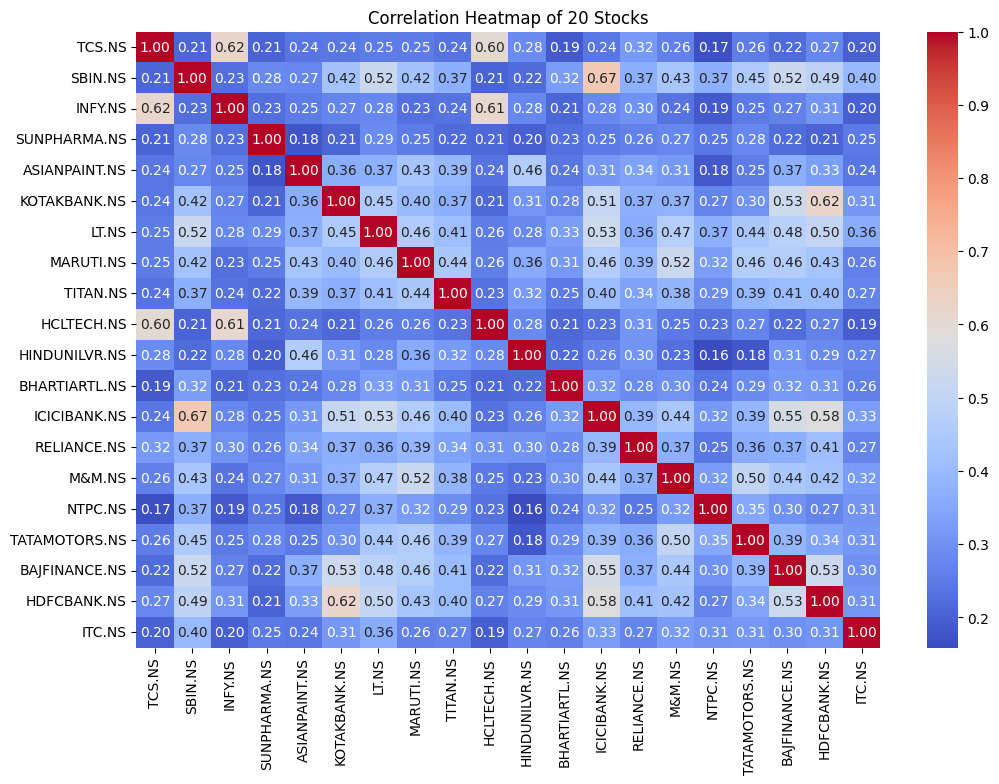

In [8]:
# Extract the 'Adj Close' prices by handling MultiIndex
adj_close_prices = stock_data.loc[:, (slice(None), 'Adj Close')]

# Flatten the MultiIndex columns
adj_close_prices.columns = adj_close_prices.columns.droplevel(1)

# Calculate daily returns
returns = adj_close_prices.pct_change().dropna()

# Calculate the correlation matrix
correlation_matrix = returns.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of 20 Stocks')
plt.show()

In [12]:
#Approach 1 - Selecting 5 stocks with the least average correlation with other stocks
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) # To not compare a stock with itself
average_correlation = correlation_matrix.mask(mask).mean()
most_uncorrelated_stocks = average_correlation.sort_values(ascending=True)
selected_stocks = most_uncorrelated_stocks[:5].index
print(selected_stocks)

Index(['SUNPHARMA.NS', 'HINDUNILVR.NS', 'HCLTECH.NS', 'INFY.NS', 'TCS.NS'], dtype='object')


In [15]:
app1 = ['SUNPHARMA.NS', 'HINDUNILVR.NS', 'HCLTECH.NS', 'INFY.NS', 'TCS.NS']
stock_data1 = yf.download(app1, start='2018-01-01', end='2023-11-01', group_by='ticker')

[*********************100%***********************]  5 of 5 completed


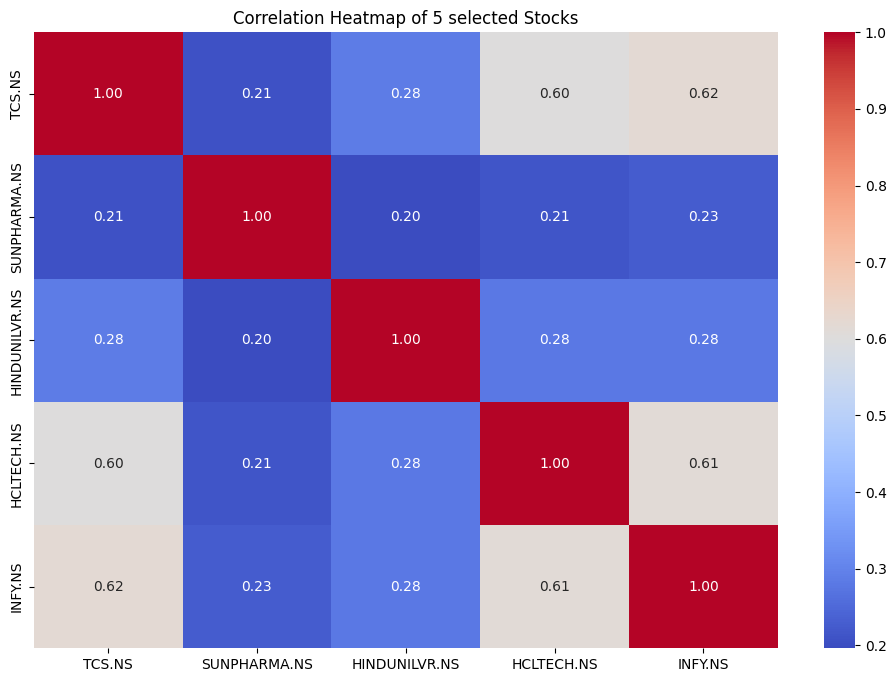

In [16]:
# Extract the 'Adj Close' prices by handling MultiIndex
adj_close_prices1 = stock_data1.loc[:, (slice(None), 'Adj Close')]

# Flatten the MultiIndex columns
adj_close_prices1.columns = adj_close_prices1.columns.droplevel(1)

# Calculate daily returns
returns1 = adj_close_prices1.pct_change().dropna()

# Calculate the correlation matrix
correlation_matrix1 = returns1.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of 5 selected Stocks')
plt.show()

In [23]:
# Approach 2 - First select the stock with the lowest avg correlation with all others. Then in each 
# iteration select the stock with the lowest avg correlation with the already selected stocks. [Better Result]

def select_uncorrelated_stocks(stock_symbols, num_stocks_to_select):
    # Download historical stock data
    stock_data = yf.download(stock_symbols, start='2018-01-01', end='2023-11-01', group_by='ticker')

    # Extract the 'Adj Close' prices by handling MultiIndex
    adj_close_prices = stock_data.loc[:, (slice(None), 'Adj Close')]

    # Flatten the MultiIndex columns
    adj_close_prices.columns = adj_close_prices.columns.droplevel(1)

    # Calculate daily returns
    returns = adj_close_prices.pct_change().dropna()

    # Calculate the correlation matrix
    correlation_matrix = returns.corr()

    # Initial stock selection - choose the stock with the lowest average correlation
    initial_stock = correlation_matrix.mean().idxmin()

    # Initialize the set of selected stocks
    selected_stocks = set([initial_stock])

    # Greedy Selection Algorithm
    for _ in range(num_stocks_to_select - 1):  # Repeat until the desired number of stocks are selected
        # For the current stock, calculate the average correlation with the already selected stocks
        avg_correlations = correlation_matrix.loc[list(selected_stocks)].mean()

        # Choose the stock with the lowest average correlation and add it to the selected set
        next_stock = avg_correlations.idxmin()
        selected_stocks.add(next_stock)

    return selected_stocks

In [25]:
selected_stocks2 = select_uncorrelated_stocks(stock_symbols, 5)
print(selected_stocks2)

[*********************100%***********************]  20 of 20 completed
{'NTPC.NS', 'SUNPHARMA.NS', 'ASIANPAINT.NS', 'BHARTIARTL.NS', 'TCS.NS'}


[*********************100%***********************]  5 of 5 completed


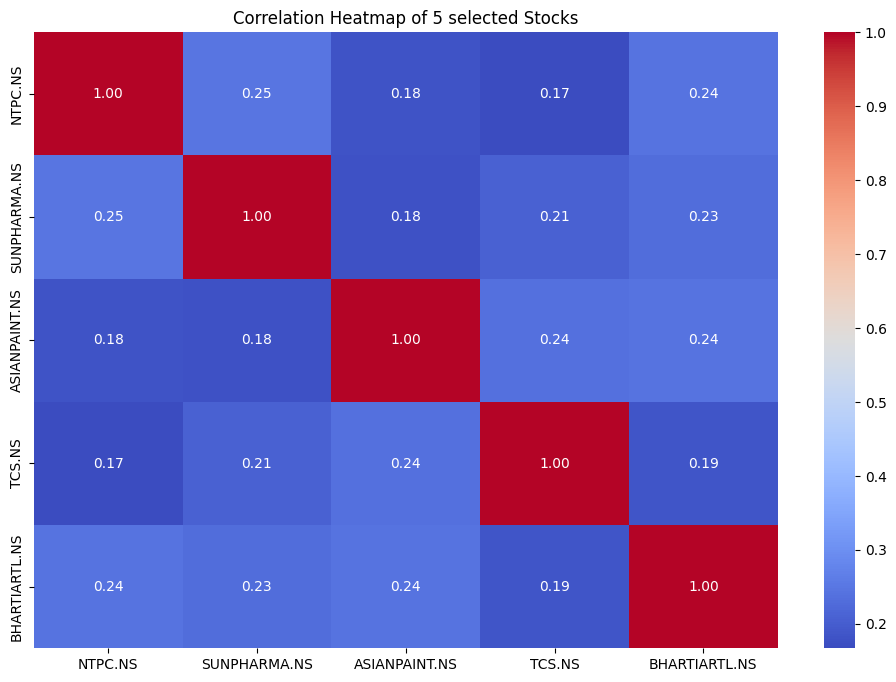

In [26]:
app2 = ['NTPC.NS', 'SUNPHARMA.NS', 'ASIANPAINT.NS', 'BHARTIARTL.NS', 'TCS.NS']
stock_data2 = yf.download(app2, start='2018-01-01', end='2023-11-01', group_by='ticker')
# Extract the 'Adj Close' prices by handling MultiIndex
adj_close_prices2 = stock_data2.loc[:, (slice(None), 'Adj Close')]

# Flatten the MultiIndex columns
adj_close_prices2.columns = adj_close_prices2.columns.droplevel(1)

# Calculate daily returns
returns2 = adj_close_prices2.pct_change().dropna()

# Calculate the correlation matrix
correlation_matrix2 = returns2.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of 5 selected Stocks')
plt.show()